In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import os
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


## Readind data

In [ ]:
import pandas as pd
import glob

path = r'/content/drive/MyDrive/poll1/train' # use your path
all_files = glob.glob(path + "/*.xls")

li = []

for filename in all_files:
    df = pd.read_excel(filename, index_col=None, header=0)
    li.append(df)

train = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
path = r'/content/drive/MyDrive/poll1/test' # use your path
all_files = glob.glob(path + "/*.xls")

li = []

for filename in all_files:
    df = pd.read_excel(filename, index_col=None, header=0)
    li.append(df)

test = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
test.shape

(8764, 23)

In [ ]:
train.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,Station: EPA Jahra Kuwait 2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,YEAR,MONTH,DAY,HR,SO2,NO,NOX,NO2,PM10,CO,CH4,NCH4,O3,WS,WG,SOLAR,TEMP-IND,TEMP-AMB,CO2,Wind Direction,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,ppm,ppm,ppm,ppm,ug/m^3,ppm,ppm,ppm,ppm,m/sec,m/sec,w/m^2,©,©,ppm,deg,sector (16),NaN
4,NaN,2007,1,1,0,0.001,0.00525,0.0308333,0.0238333,20.5,1.05833,2.79917,0.0325,0.00375,1.78333,2.48333,4.04683,22.25,5.33333,328.583,277.667,13,W


In [ ]:
test.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,Hourly Data For Jahra Fixed Station 2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,YEAR,MONTH,DAY,HR,SO2,NO,NOX,NO2,PM10,CO,CH4,NCH4,O3,WS,WG,SOLAR,TEMP-IND,TEMP-AMB,CO2,Wind Direction,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,ppm,ppm,ppm,ppm,ug/m^3,ppm,ppm,ppm,ppm,m/sec,m/sec,w/m^2,©,©,ppm,deg,sector (16),NaN
4,NaN,2009,1,1,0,0.00425,0.07525,0.145583,0.06875,100.417,1.21667,1.7625,0.286667,0.01,0.275,0.5,7.08333,24.5,16.25,362.75,163,8,SSE


In [ ]:
train=train.drop(['Unnamed: 0','Unnamed: 22'],axis=1)
test=test.drop(['Unnamed: 0','Unnamed: 22'],axis=1)


In [ ]:
train=train.rename(columns={'Unnamed: 1':'YEAR','Unnamed: 2':'MONTH','Unnamed: 3':'DAY','Unnamed: 4':'HOUR','Unnamed: 5':'SO2','Unnamed: 6':'NO','Unnamed: 7':'NOX','Unnamed: 8':'NO2-ppm','Unnamed: 9':'PM10','Unnamed: 10':'CO','Unnamed: 11':'CH4-ppm','Unnamed: 12':'NCH4-ppm','Unnamed: 13':'O3-ppm','Unnamed: 14':'WS','Unnamed: 15':'WG','Unnamed: 16':'SOLAR','Unnamed: 17':'TEMP-IND','Unnamed: 18':'TEMP-AMB','Unnamed: 19':'CO2-ppm','Unnamed: 20':'WD-DEG','Unnamed: 21':'SECTOR'})
test=test.rename(columns={'Unnamed: 1':'YEAR','Unnamed: 2':'MONTH','Unnamed: 3':'DAY','Unnamed: 4':'HOUR','Unnamed: 5':'SO2','Unnamed: 6':'NO','Unnamed: 7':'NOX','Unnamed: 8':'NO2-ppm','Unnamed: 9':'PM10','Unnamed: 10':'CO','Unnamed: 11':'CH4-ppm','Unnamed: 12':'NCH4-ppm','Unnamed: 13':'O3-ppm','Unnamed: 14':'WS','Unnamed: 15':'WG','Unnamed: 16':'SOLAR','Unnamed: 17':'TEMP-IND','Unnamed: 18':'TEMP-AMB','Unnamed: 19':'CO2-ppm','Unnamed: 20':'WD-DEG','Unnamed: 21':'SECTOR'})


In [ ]:
test=test[4:]

In [ ]:
MONTH=test['YEAR'].astype(str)+str('-')+test['MONTH'].astype(str)+str('-')+test['DAY'].astype(str)+str(':')+test['HOUR'].astype(str)

In [ ]:
test.isnull().sum()


YEAR          0
MONTH         0
DAY           0
HOUR          0
SO2         869
NO          124
NOX         124
NO2-ppm     124
PM10        654
CO          133
CH4-ppm     976
NCH4-ppm    976
O3-ppm      222
WS          119
WG          119
SOLAR       119
TEMP-IND    119
TEMP-AMB    119
CO2-ppm     463
WD-DEG      119
SECTOR      119
dtype: int64

In [ ]:
train=train.dropna()
#test=test.dropna()

In [ ]:
train=train.astype('float')

In [ ]:
train

,YEAR,MONTH,DAY,HOUR,SO2,NO,NOX,NO2-ppm,PM10,CO,CH4-ppm,NCH4-ppm,O3-ppm,WS,WG,SOLAR,TEMP-IND,TEMP-AMB,CO2-ppm,WD-DEG,SECTOR
4,2007.0,1.0,1.0,0.0,0.001000,0.005250,0.030833,0.023833,20.500000,1.058333,2.799167,0.032500,0.003750,1.783333,2.483333,4.046833,22.250000,5.333333,328.583333,277.666667,13.0
5,2007.0,1.0,1.0,1.0,0.001417,0.008917,0.036417,0.025167,13.583333,1.566667,2.778333,0.034167,0.002417,2.158333,2.866667,4.391833,21.666667,4.750000,325.916667,265.250000,13.0
6,2007.0,1.0,1.0,2.0,0.001083,0.003583,0.024917,0.019917,20.250000,1.275000,2.793333,0.025833,0.003500,2.450000,3.316667,6.068917,22.333333,4.000000,325.750000,266.500000,13.0
7,2007.0,1.0,1.0,3.0,0.001000,0.000833,0.009750,0.008583,9.416667,1.116667,2.739167,0.020000,0.006250,2.266667,3.141667,5.073750,21.583333,4.333333,319.916667,278.083333,13.0
8,2007.0,1.0,1.0,4.0,0.001000,0.000833,0.007083,0.006333,19.333333,1.066667,2.750000,0.018333,0.006583,2.408333,3.341667,5.486833,22.083333,4.000000,313.416667,285.583333,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26311,2006.0,12.0,31.0,19.0,0.001417,0.026167,0.068917,0.040083,35.000000,1.158333,2.748333,0.050833,0.002250,1.791667,2.408333,3.677417,21.750000,8.000000,325.666667,299.166667,15.0
26312,2006.0,12.0,31.0,20.0,0.001917,0.023833,0.066833,0.040417,22.000000,0.508333,2.719167,0.071667,0.002083,1.600000,2.166667,3.502333,22.166667,7.166667,331.916667,287.500000,14.0
26313,2006.0,12.0,31.0,21.0,0.001417,0.013167,0.052833,0.037000,22.666667,0.341667,2.749167,0.047500,0.002417,2.016667,2.750000,5.448500,21.500000,7.000000,332.750000,295.500000,14.0
26314,2006.0,12.0,31.0,22.0,0.001000,0.007083,0.041000,0.031833,19.750000,0.283333,2.725000,0.035000,0.003667,2.600000,3.466667,5.096083,22.416667,6.750000,331.916667,298.416667,14.0


In [ ]:
train.isnull().sum()

YEAR        0
MONTH       0
DAY         0
HOUR        0
SO2         0
NO          0
NOX         0
NO2-ppm     0
PM10        0
CO          0
CH4-ppm     0
NCH4-ppm    0
O3-ppm      0
WS          0
WG          0
SOLAR       0
TEMP-IND    0
TEMP-AMB    0
CO2-ppm     0
WD-DEG      0
SECTOR      0
dtype: int64

In [ ]:
test.isnull().sum()

YEAR        0
MONTH       0
DAY         0
HOUR        0
SO2         0
NO          0
NOX         0
NO2-ppm     0
PM10        0
CO          0
CH4-ppm     0
NCH4-ppm    0
O3-ppm      0
WS          0
WG          0
SOLAR       0
TEMP-IND    0
TEMP-AMB    0
CO2-ppm     0
WD-DEG      0
SECTOR      0
dtype: int64

In [ ]:
train.head()

,YEAR,MONTH,DAY,HOUR,SO2,NO,NOX,NO2-ppm,PM10,CO,CH4-ppm,NCH4-ppm,O3-ppm,WS,WG,SOLAR,TEMP-IND,TEMP-AMB,CO2-ppm,WD-DEG,SECTOR
4,2007.0,1.0,1.0,0.0,0.001000,0.005250,0.030833,0.023833,20.500000,1.058333,2.799167,0.032500,0.003750,1.783333,2.483333,4.046833,22.250000,5.333333,328.583333,277.666667,13.0
5,2007.0,1.0,1.0,1.0,0.001417,0.008917,0.036417,0.025167,13.583333,1.566667,2.778333,0.034167,0.002417,2.158333,2.866667,4.391833,21.666667,4.750000,325.916667,265.250000,13.0
6,2007.0,1.0,1.0,2.0,0.001083,0.003583,0.024917,0.019917,20.250000,1.275000,2.793333,0.025833,0.003500,2.450000,3.316667,6.068917,22.333333,4.000000,325.750000,266.500000,13.0
7,2007.0,1.0,1.0,3.0,0.001000,0.000833,0.009750,0.008583,9.416667,1.116667,2.739167,0.020000,0.006250,2.266667,3.141667,5.073750,21.583333,4.333333,319.916667,278.083333,13.0
8,2007.0,1.0,1.0,4.0,0.001000,0.000833,0.007083,0.006333,19.333333,1.066667,2.750000,0.018333,0.006583,2.408333,3.341667,5.486833,22.083333,4.000000,313.416667,285.583333,13.0


In [ ]:
train.shape,test.shape

((18606, 21), (6556, 21))

## Data preprocessing

In [ ]:
i = test[((test.YEAR == 'YEAR'))].index

test=test.drop(i,axis=0)


In [ ]:
'''
MONTH=test['YEAR'].astype(str)+str('-')+test['MONTH'].astype(str)+str('-')+test['DAY'].astype(str)+str(':')+test['HOUR'].astype(str)
'''

"\nMONTH=test['YEAR'].astype(str)+str('-')+test['MONTH'].astype(str)+str('-')+test['DAY'].astype(str)+str(':')+test['HOUR'].astype(str)\n"

In [ ]:
MONTH

0       Hourly Data For Jahra Fixed Station 2009-nan-n...
1                                         nan-nan-nan:nan
2                                       YEAR-MONTH-DAY:HR
3                                         nan-nan-nan:nan
4                                              2009-1-1:0
                              ...                        
8759                                        2009-12-31:19
8760                                        2009-12-31:20
8761                                        2009-12-31:21
8762                                        2009-12-31:22
8763                                        2009-12-31:23
Length: 8764, dtype: object

In [ ]:

train=train.drop(['YEAR','MONTH','DAY','HOUR'],axis=1)
test=test.drop(['YEAR','MONTH','DAY','HOUR'],axis=1)


In [ ]:
X_train = train.drop("O3-ppm", axis=1)
y_train = train["O3-ppm"]
X_test  = test.drop("O3-ppm", axis=1)
Y_test  = test["O3-ppm"]


In [ ]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)

X_test = StandardScaler().fit_transform(X_test)


## SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import svm



In [ ]:
svr = SVR(kernel='rbf', C=1e3, gamma = 0.5, epsilon = 0.01)
svm_pred = svr.fit(X_train, y_train).predict(X_test)

ValueError: ignored

In [ ]:
svm_pred

In [ ]:
import numpy as np
mse1=mean_absolute_error(Y_test,svm_pred)
mse1

NameError: ignored

## PLS Regression

In [ ]:
from sklearn.cross_decomposition import PLSRegression
pls2 = PLSRegression()
pls2.fit(X_train, y_train)

pls_pred = pls2.predict(X_test)

In [ ]:
mse2=mean_absolute_error(Y_test,pls_pred)

mse2

0.010799792361613152

In [ ]:
from sklearn.preprocessing import scale 
from sklearn import model_selection 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid number of components: 17

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid number of components: 17

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid number of components: 17

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition f

(-1.0, 16.75)

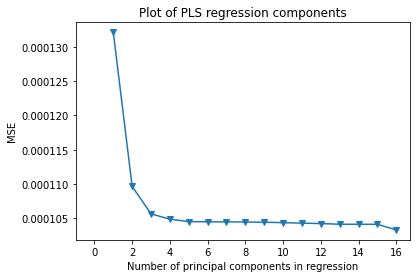

In [ ]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Plot of PLS regression components')
plt.xlim(xmin=-1)

## Multiple Regression

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

rg=regr.fit(X_train, y_train)

rg_pred = regr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

mse3=mean_absolute_error(Y_test,rg_pred)
mse3

0.01086596669436144

In [ ]:
print(rg.coef_)

[ 0.00127725  0.03718478 -0.04471889  0.00671112 -0.00052222 -0.00044297
 -0.00077271 -0.00044424 -0.00425894  0.00545348  0.00312656 -0.00138265
  0.00463292  0.0007502  -0.00068164  0.00017907]


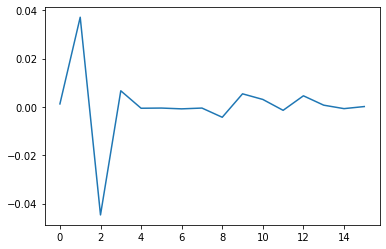

In [ ]:
plt.plot(rg.coef_)

In [ ]:
from statsmodels.regression.linear_model import OLS

model = OLS(y_train,X_train)
results = model.fit()
su = results.summary()
su.as_csv

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<bound method Summary.as_csv of <class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
Dep. Variable:                 O3-ppm   R-squared (uncentered):                   0.239
Model:                            OLS   Adj. R-squared (uncentered):              0.238
Method:                 Least Squares   F-statistic:                              364.1
Date:                Tue, 16 Mar 2021   Prob (F-statistic):                        0.00
Time:                        10:28:21   Log-Likelihood:                          47278.
No. Observations:               18606   AIC:                                 -9.452e+04
Df Residuals:                   18590   BIC:                                 -9.440e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err        

# Chalenge



```
# Ce texte est au format code
```


## Gradient Boosting regression


In [ ]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
gbr_pred_R = reg.predict(X_test)

mse4 = mean_squared_error(Y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse4))

The mean squared error (MSE) on test set: 0.0001


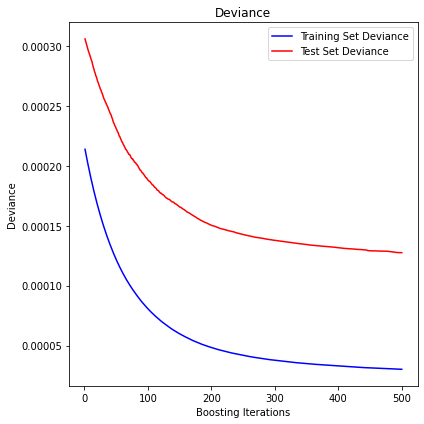

In [ ]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(Y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

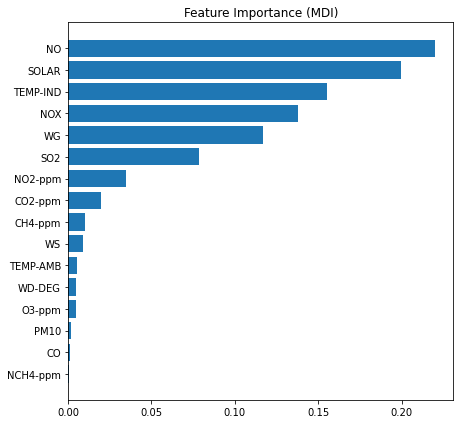

In [ ]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(train.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

fig.tight_layout()
plt.show()

# Deep learning

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import Input


# split into input (X) and output (Y) variables
X = X_train
Y = y_train

# define the model
def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(16, input_dim=16, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [ ]:
larger_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


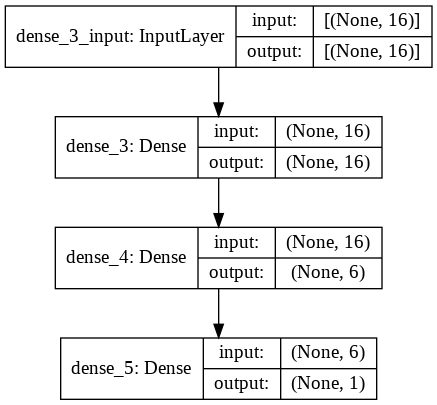

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(larger_model(), to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=larger_model, batch_size=32,epochs=200)

In [ ]:
results=regressor.fit(X_train,y_train)


Epoch 1/200
582/582 [==============================] - 1s 1ms/step - loss: 1.1459e-04
Epoch 2/200
582/582 [==============================] - 1s 1ms/step - loss: 5.0156e-05
Epoch 3/200
582/582 [==============================] - 1s 991us/step - loss: 4.7236e-05
Epoch 4/200
582/582 [==============================] - 1s 1ms/step - loss: 4.5793e-05
Epoch 5/200
582/582 [==============================] - 1s 1ms/step - loss: 4.3828e-05
Epoch 6/200
582/582 [==============================] - 1s 1ms/step - loss: 4.4119e-05
Epoch 7/200
582/582 [==============================] - 1s 1ms/step - loss: 4.0924e-05
Epoch 8/200
582/582 [==============================] - 1s 999us/step - loss: 3.8998e-05
Epoch 9/200
582/582 [==============================] - 1s 1ms/step - loss: 3.6356e-05
Epoch 10/200
582/582 [==============================] - 1s 1ms/step - loss: 3.8899e-05
Epoch 11/200
582/582 [==============================] - 1s 1ms/step - loss: 3.6761e-05
Epoch 12/200
582/582 [==========================

In [ ]:
deep_pred= regressor.predict(X_test)
deep_pred.shape

(6556,)

In [ ]:
MONTH[4:6560].shape

(6556,)

In [ ]:
mse5=mean_absolute_error(Y_test,deep_pred)
mse5

0.009124294378047423

# Results

In [ ]:
results = pd.DataFrame({'Model': ['SVM', 'PLS','MLR','GBR','Deep learning'],
                        'Mean Absolute Error': [ mse1,mse2,mse3,mse4,mse5]})
result_df = results.sort_values(by='Mean Absolute Error', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Mean Absolute Error
Model,
MLR,0.010866
PLS,0.010800
SVM,0.009447
Deep learning,0.009124
GBR,0.000128


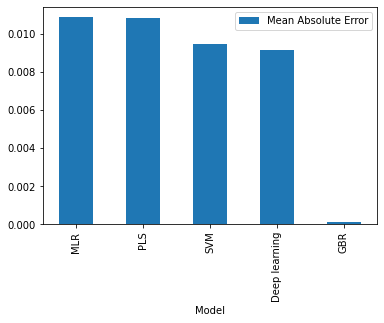

In [ ]:
result_df.plot(kind='bar')


In [ ]:
Y_test.shape

(6556,)

In [ ]:
results = pd.DataFrame({'MONTH':MONTH[4:6560],
                        'Actual':Y_test ,
                        'SVM_Predicted':list(svm_pred.flatten()),
                        'PLS_Predicted':list(pls_pred.flatten()),
                        'RG_Predicted':list(rg_pred.flatten()),
                        'GBR_Predicted':list(gbr_pred_R.flatten()),
                        'Deep_Predicted':list(deep_pred.flatten())

                        })
result_df = results.sort_values(by='MONTH', ascending=False)
result_df = result_df.set_index('MONTH')
result_df.head()
result_df.to_csv(r'results.csv')

ValueError: ignored